The basis of this project is to measure a real world phenomenon across one hundred data points with four different variables, using a synthesised data set.

Recently my workplace offered all employees access to vaccination for the flu and I decided to try model my project on this concept.  My interest in this stems from my working in a healthcare setting (though not a health care practitioner) and I'm intrigued by epidemiological data.

My project idea is based on 100 staff members who availed of the vaccine and describes - 
* Their age
* The department they work in
* Their gender
* If they had the vaccine the previous year

If I was to carry out this research on actual data, rather than synthesised, I would carry out a survey of vaccinated staff and collate their responses to inform the results.  

[25 25 42 36 44 47 52 34 36 18 19 26 24 55 58 29 27 51 60 35 22 33 53 62
 25 54 28 30 43 45 36 37 31 45 51 54 37 44 29 50 35 45 38 20 33 61 62 46
 54 52 63 63 39 57 25 22 39 64 45 26 40 23 44 21 42 52 59 25 61 54 59 23
 26 35 37 23 24 22 20 42 34 22 62 28 56 45 61 56 46 28 61 20 55 38 37 54
 34 31 64 42]


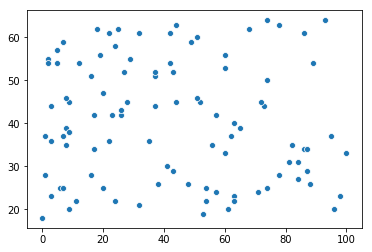

In [8]:
import pandas as pd  
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
 
staff = np.random.choice(101, 100) #generates an array of 100 numbers between 1 and 100
staff_ages = np.random.randint(18, 65, 100)#generates an array of 100 numbers between 18 and 65
print (staff_ages)
sns.scatterplot(staff, staff_ages)

In [5]:
department = (["Accounts", "Engineering", "Administration", "Facilities"])
#need to assign 25 variables from "staff" to the 4 departments and create a dataframe of these values
df = pd.DataFrame(np.random.multinomial(100,[4/25.]*4, size=1)) #https://stackoverflow.com/questions/3589214/generate-multiple-random-numbers-to-equal-a-value-in-python
df.columns = (["Accounts", "Engineering", "Administration", "Facilities"])
df.index = (["Total"])
print (df)

       Accounts  Engineering  Administration  Facilities
Total        20           21              17          42


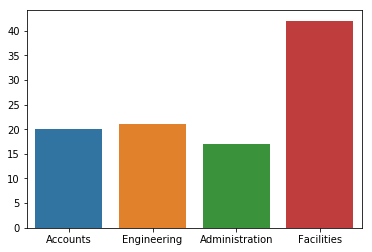

In [6]:
#vaccine uptake
sns.barplot(data=df)

In [ ]:
#vaccine uptake
